PIPELINE 4: DATASET BAN ĐẦU -> UNSUPERVISED LEARNING -> GIẢM CHIỀU -> DECISION TREES

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

dfcl = pd.read_csv('../DatasetULDR.csv')

In [2]:
dfcl.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,booking_status
0,-2.270806,-0.601601,-1.363624,-1.187978,1.856841,0.201197,0.721372,-1.070744,-0.089678,0.699492,-0.129017,0.168041,1.246082,-1.326446,-0.079574,-0.035906,0.324580,1
1,-0.059227,-0.750395,2.336583,0.075718,0.899444,-0.581462,0.309531,-0.882073,0.375217,1.429941,0.027480,-0.782959,-1.054199,0.970113,0.086524,0.539839,-0.521322,1
2,-1.790440,-0.166536,0.135464,1.002173,-1.593193,1.694133,-0.525868,1.168341,0.241091,0.654274,1.229783,0.748422,-0.378145,0.176156,0.447160,-1.089479,0.721771,0
3,-1.249520,-0.917739,-0.979267,1.216120,-0.152780,-0.687254,-0.087255,0.408977,-0.055169,-0.773868,-0.640992,0.056787,1.078385,-0.586997,-0.535962,-0.627228,0.684160,0
4,-0.687024,-0.592319,1.885979,0.922804,-1.287219,-0.550610,0.123453,-0.408538,-0.143795,1.640543,-0.385892,-0.475164,-0.007202,-0.311440,-0.159440,0.013601,0.234163,0


Phân tách các đặc trưng và biến mục tiêu

In [3]:
X = dfcl.drop(columns=['booking_status'])
y = dfcl['booking_status']

Chia tập train/test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (26668, 17)
X_test shape: (6668, 17)
y_train shape: (26668,)
y_test shape: (6668,)


Train model

In [5]:
model = DecisionTreeClassifier(
    max_depth=10,         
    min_samples_split=10,   
    min_samples_leaf=5,     
    random_state=42
)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

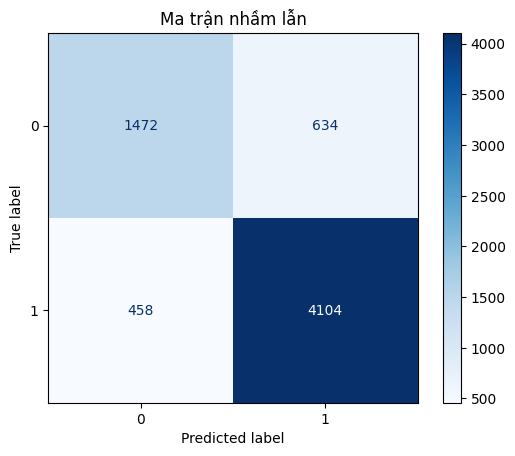

Kết quả:

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      2106
           1       0.87      0.90      0.88      4562

    accuracy                           0.84      6668
   macro avg       0.81      0.80      0.81      6668
weighted avg       0.83      0.84      0.83      6668



In [ ]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['0', '1'])
disp.plot(cmap='Blues')
plt.title('Ma trận nhầm lẫn')
plt.grid(False)
plt.show()

print("Kết quả:\n")
print(classification_report(y_test, y_pred))